In [52]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [53]:
df=pd.read_csv('BreastCancerData.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [54]:
df.shape
# data has 569 rows and 33 columns

(569, 33)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [56]:
df.diagnosis.value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [57]:
mapping={'B':0, 'M':1}
mapping

{'B': 0, 'M': 1}

In [58]:
df.diagnosis=df.diagnosis.map(mapping)

In [59]:
df.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

We have now converted the diagnosis categorical column to numerical column with 0 denoting Begign and 1 denoting Malignant. 

In [60]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

There are no missing values. Data seems good to move to the next steps. 
There seems to be extra column which is all null. Dropping this column Unnamed in the next step. b

In [61]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [62]:
df=df.drop(['Unnamed: 32'], axis=1)

In [63]:
df.shape # We have now 32 columns

(569, 32)

In [64]:
df.duplicated().sum()
# There are no duplicated rows

0

Let's segregate the data between independent features and dependent features

In [65]:
# Segregating the dependent and independent variables
x=df.drop(['diagnosis'],axis=1)
y=df['diagnosis']
x.shape, y.shape

((569, 31), (569,))

In [66]:
# Lets Scale the data. We are going to use KNN algogithm so sclaing data is necessary
from sklearn.preprocessing import MinMaxScaler
MinMaxScale=MinMaxScaler()
x_scaled=MinMaxScale.fit_transform(x)
# This gives us an array object

In [67]:
x=pd.DataFrame(x_scaled,columns=x.columns)
x.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.000915,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.000915,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.092495,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.092547,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.092559,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


### Now all variables are scaled between 0 and 1

In [68]:
# lets split the x, y data to test train so we can fit majority of data to train and keep some data for test
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y=train_test_split(x,y, random_state=42, stratify=y)
print( 'train_x shape {}'.format(train_x.shape))
print( 'test_x shape {}'.format(test_x.shape))
print( 'train_y shape {}'.format(train_y.shape))
print( 'test_y shape {}'.format(test_y.shape))

train_x shape (426, 31)
test_x shape (143, 31)
train_y shape (426,)
test_y shape (143,)


### Lets implement KNN Classifier to this data which is a distance based lazy algorithm


In [96]:
from sklearn.neighbors import KNeighborsClassifier as KNN
model=KNN(n_neighbors=5) # lets set n neighbours to 10

# fit the model
model.fit(train_x,train_y)

# Predicting on test set and calculating accuracy
preds_y=model.predict(test_x)

# Lets test the F1 score
from sklearn.metrics import f1_score
f1score=f1_score(preds_y,test_y)

# print f1_score
print(' F1 score of breast cancer dataset is {}'.format(f1score))


 F1 score of breast cancer dataset is 0.9504950495049505


### This is a pretty good accuracy but lets find out what the optimum value of k will be to get the best model

### To find out the best model we use the Elbow method where we test the model with various value of K and see the point with least error

In [107]:
# Elbow method implementation
def Elbow(K):
    
    # lets create an empty list to later fill with test_error
    train_trail_error=[]
    test_trail_error=[]
    
    # Lets run the model on a loop with various values of K
    for i in K:
        model_trail=KNN(n_neighbors=i) # lets set n neighbours to 10

        # fit the model
        model_trail.fit(train_x,train_y)

        # Predicting on test set and calculating accuracy
        train_preds_y=model_trail.predict(train_x)
        test_preds_y=model_trail.predict(test_x)

        # Lets test the F1 score
        train_f1score=f1_score(train_preds_y,train_y)
        test_f1score=f1_score(test_preds_y,test_y)

        # calculate the error
        train_error=1-train_f1score
        train_trail_error.append(train_error)
        
        test_error=1-test_f1score
        test_trail_error.append(test_error)
        
    return train_trail_error, test_trail_error

In [99]:
# lets run a trail for values of 1 to 20
K=range(1,20)

In [108]:
# Now lets call the function Elbow to do the iteration for values of K
train_trail, test_trail=Elbow(K)

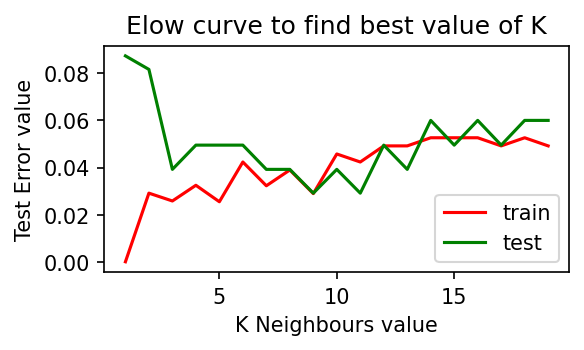

In [117]:
# Lets plot the elbow based on the function
plt.figure(figsize=(4,2), dpi=150)
plt.plot(K[0:20], train_trail[0:20], color = 'red' , label = 'train')
plt.plot(K[0:20], test_trail[0:20], color = 'green', label = 'test')
plt.xlabel('K Neighbours value')
plt.ylabel('Test Error value')
plt.title('Elow curve to find best value of K')
plt.legend()

In [111]:
# get the index of minimum value of test error
minK=trail.index(min(test_trail))

In [112]:
from sklearn.neighbors import KNeighborsClassifier as KNN
model=KNN(n_neighbors=minK) # lets set n neighbours from elbow method

# fit the model
model.fit(train_x,train_y)

# Predicting on test set and calculating accuracy
preds_y=model.predict(test_x)

# Lets test the F1 score
from sklearn.metrics import f1_score
f1score=f1_score(preds_y,test_y)

# print f1_score
print(' F1 score of breast cancer dataset is {}'.format(f1score))



 F1 score of breast cancer dataset is 0.9607843137254902


In [119]:
## Model predicts with >96 % accuracy on test data. 

## What were the main important features that predicted whether cancer was begign or Malignant?

In [122]:
# feature importance 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# apply K best algorithms and get their scores
best_features=SelectKBest(score_func=chi2, k=9)
features_rank=best_features.fit(x,y)
features_rank.scores_

# change array to data frame and sort
Features_Imp=pd.DataFrame(features_rank.scores_)
column_names=pd.DataFrame(x.columns)
scores=pd.concat([column_names, Features_Imp], axis=1)
scores.columns=['Columns','FeaturesScores']
scores.sort_values(by='FeaturesScores', ascending=False)

,Columns,FeaturesScores
8,concave points_mean,52.405743
28,concave points_worst,46.341648
7,concavity_mean,46.186395
24,area_worst,35.043882
23,perimeter_worst,34.438091
21,radius_worst,34.124937
27,concavity_worst,31.563031
4,area_mean,29.328594
3,perimeter_mean,26.528902
1,radius_mean,24.897293


Above are the variables which were important to predict whether cancer was begign or malignant in order of highest to lowest. 

# Takeaways- 

- The goal of machine learning is to create generalized models so try not to overfit and underfit
    - Underfitting is high bias where info is left by the model.( Not interested in learning)
    - Overfitting is high variance ( memorizing) where model is complex and perfoms badly on new data. 
